In [1]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
# 원래 json 경로 
root = "./New_Sejong_RCV_dataset/RGBTDv3/json_depth_check_with_tool_change/"
# New Label 을 저장할 경로
new_root = "./New_Sejong_RCV_dataset/RGBTDv3/json_depth_label_4"
# 경로 생성
if not os.path.exists(new_root):
    os.makedirs(new_root)


In [3]:
mins=[]
# 임의로 각 라벨을 네이밍
Labels_12_ver1=["Pedestrian_02","Pedestrian_03","Pedestrian_04","Pedestrian_05","Pedestrian_06","Pedestrian_07","Pedestrian_08","Pedestrian_08P"]
Labels_12_ver4=["Pedestrian_02","Pedestrian_04","Pedestrian_07","Pedestrian_07P"]

for Set in os.listdir(root):
   
    for i in os.listdir(os.path.join(root,Set)):
        # 기존 json 불러오기
        with open(os.path.join(root,Set,i)) as j:
            target = json.load(j)
        for ann in target["annotation"]:
            
            #if ann["occlusion"]==2:
             #   continue
            # 현재는 ignore 만 아니면 다 변환 하도록 코드가 짜져있음
            if ann["category_id"]!=-1:
                # depth를 M 단위로 변환
                depth=ann["depth"]/1000   
                height=ann["bbox"][3]-ann["bbox"][1]
                # Depth 에 따라서 임의로 네이밍한 라벨을 부여
                if depth<2: # 2M 보다 작을 경우 Pedestrian_02
                        depth_5=1
                        new_label=Labels_12_ver4[0]
                elif depth>=2 and depth<4:# 2M ~4M Pedestrian_04
                        depth_5=2
                        new_label=Labels_12_ver4[1]
                elif depth>=4 and depth<7:# 4M ~7M Pedestrian_07
                        depth_5=3
                        new_label=Labels_12_ver4[2]
                elif depth>=7:# 7M~ Pedestrian_07
                        depth_5=4
                        new_label=Labels_12_ver4[3]
                else: # 예외 처리
                    print("out")

                ann["Label"]=new_label
                ann["category_id"]=depth_5
                
        if not os.path.exists(os.path.join(new_root,Set)):
            os.makedirs(os.path.join(new_root,Set))
        # 새로운 경로에 저장
        with open(os.path.join(new_root,Set,i),"w") as j:
            json.dump(target,j)


In [4]:
# 새로 만든 라벨의 경향성을 보기 위한 visualization
# Dictionary 에 bbox 마다 Depth 와 heigh를 저장
# Dictionary 준비
height_New_1={"Pedestrian_02":[],"Pedestrian_03":[],"Pedestrian_04":[],"Pedestrian_05":[],"Pedestrian_06":[],"Pedestrian_07":[],"Pedestrian_08":[],"Pedestrian_08P":[]}
depth_New_1={"Pedestrian_02":[],"Pedestrian_03":[],"Pedestrian_04":[],"Pedestrian_05":[],"Pedestrian_06":[],"Pedestrian_07":[],"Pedestrian_08":[],"Pedestrian_08P":[]}
height_New_3={"Pedestrian_02":[],"Pedestrian_04":[],"Pedestrian_07":[],"Pedestrian_07P":[]}
depth_New_3={"Pedestrian_02":[],"Pedestrian_04":[],"Pedestrian_07":[],"Pedestrian_07P":[]}
traintxt=open("./New_Sejong_RCV_dataset/Thr_train.txt","r")
json_labelpath=new_root+"/%s/%s"#"./New_Sejong_RCV_dataset/RGBTDv3/json_depth_label_/%s/%s"
for i in traintxt:
    # 각 파일의 이름을 잘 보자 
    # label과 이미지의 이름이 다를 수도 있고 
    # Set 마다 다른 경우도 가끔 있을 수 있음
    number=int(i.split("_")[-1][:-1])
    if number!=1:
        number=number/10
    ids="RGB_L_%07d.json"%number
    paths=json_labelpath%(i.split("/")[3],ids)
    # json open
    with open(os.path.join(paths)) as j:
        target = json.load(j)
    for ann in target["annotation"]:    
        if ann["category_id"]==-1:
            continue
        try:
            if ann["Label"] in Labels_12_ver4:
                height=ann["bbox"][3]-ann["bbox"][1]
                # dictionary의 key 가 라벨이니 그에 맞게 Depth 와 Heigh가 순서대로 저장
                depth_New_3[ann["Label"]].append(ann["depth"]/1000)
                height_New_3[ann["Label"]].append(height)
        except:
            import pdb;pdb.set_trace()


2225.0
2527.0
1834.0
1458.0


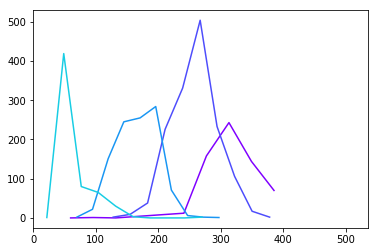

In [5]:
# 새로 만든 라벨의 경향성을 보기 위한 visualization

colors = cm.rainbow(np.linspace(0, 1,11))
cnt=0;
fig = plt.figure()
# 3D plot 용
#ax = Axes3D(fig)
hist_labels=list()# 각 구간의 Height 라벨
hists=list()# 빈도수 저장 용 list
depth_s=list()
for Label in Labels_12_ver4:
    
    heights_=height_New_3[Label]
    depths_=depth_New_3[Label]
    depths_=np.array(depths_)
    plots_=np.array(plots_)

    if len(plots_)==0:
        continue
    maxs=plots_.max()
    mins=plots_.min()
    mis=maxs-mins
    depth_=np.zeros(10)
    hist=np.zeros(10)
    hist_label=np.zeros(10)
    
    for i in range(10):
        #import pdb;pdb.set_trace()
        minnp=heights_[(heights_> mins+mis/10*i)*(heights_< mins+mis/10*(i+1))]
        depth=depths_[(heights_> mins+mis/10*i)*(heights_< mins+mis/10*(i+1))]
        if len(depth)==0:
            depth_[i]==0
        else:
            depth_[i]=int(depth.mean())
        hist[i]=len(minnp)
        hist_label[i]=int(mins+mis/10*i)

    
    plt.xlim(0,535)
    hist_labels.append(hist_label)
    hists.append(hist)
    depth_s.append(depth_)
    # import  pdb;pdb.set_trace()
    print(np.array(hist_label).sum())
    plt.plot(hist_label,hist,color=colors[cnt])
    # 3D plot 용
    #ax.view_init(-15, 30)
    #ax.set_ylim(0,300)
    #ax.set_xlabel('height Label')
    #ax.set_ylabel('many Label')
    #ax.set_zlabel ('depth Label')
    #ax.plot(hist_label,hist , depth_,5,5,5,color=colors[cnt])

    cnt+=1

plt.show()

In [28]:
300
250
210
150
110
90


[]

In [65]:
sum=0
for i in depth_New_3:
    sum+=len(depth_New_3[i])
    print(i," ",len(depth_New_3[i]))

Pedestrian_02   675
Pedestrian_03   714
Pedestrian_04   777
Pedestrian_05   580
Pedestrian_06   323
Pedestrian_07   139
Pedestrian_08   79
Pedestrian_08P   524


In [26]:
depth_New_3["Pedestrian_02"]

[0, 0, 0, 0, 0, 0]

In [66]:
sum

3811

In [9]:
for i in depth_New_3:
    print(i,np.array(depth_New_3[i]).mean())

Pedestrian_02 1.4466725925925925
Pedestrian_04 3.0123702213279673
Pedestrian_07 5.053271593090211
Pedestrian_07P 9.938150912106137
